<a href="https://colab.research.google.com/github/marioleandrovanegas/Unidad2/blob/main/Unidad2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
! git clone https://github.com/marioleandrovanegas/Unidad2.git

Cloning into 'Unidad2'...
remote: Enumerating objects: 21, done.
remote: Counting objects: 100% (21/21), done.
remote: Compressing objects: 100% (20/20), done.
remote: Total 21 (delta 4), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (21/21), 361.50 KiB | 3.12 MiB/s, done.
Resolving deltas: 100% (4/4), done.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [4]:
data = pd.read_csv("/content/Unidad2/vivienda2.csv")

In [5]:
data.head()

,id,zona,piso,estrato,preciom,areaconst,parqueaderos,banios,habitaciones,tipo,barrio,longitud,latitud
0,1147.0,Zona Oriente,NaN,3.0,250.0,70.0,1.0,3.0,6.0,Casa,20 de julio,-76.51168,3.43382
1,1169.0,Zona Oriente,NaN,3.0,320.0,120.0,1.0,2.0,3.0,Casa,20 de julio,-76.51237,3.43369
2,1350.0,Zona Oriente,NaN,3.0,350.0,220.0,2.0,2.0,4.0,Casa,20 de julio,-76.51537,3.43566
3,5992.0,Zona Sur,2.0,4.0,400.0,280.0,3.0,5.0,3.0,Casa,3 de julio,-76.54000,3.43500
4,1212.0,Zona Norte,1.0,5.0,260.0,90.0,1.0,2.0,3.0,Apartamento,acopi,-76.51350,3.45891


In [6]:
df = data[(data["zona"] == "Zona Norte") & (data["tipo"] == "Casa")]
df.head()

,id,zona,piso,estrato,preciom,areaconst,parqueaderos,banios,habitaciones,tipo,barrio,longitud,latitud
8,1209.0,Zona Norte,2.0,5.0,320.0,150.0,2.0,4.0,6.0,Casa,acopi,-76.51341,3.47968
9,1592.0,Zona Norte,2.0,5.0,780.0,380.0,2.0,3.0,3.0,Casa,acopi,-76.51674,3.48721
10,4057.0,Zona Norte,2.0,6.0,750.0,445.0,NaN,7.0,6.0,Casa,acopi,-76.52950,3.38527
11,4460.0,Zona Norte,2.0,4.0,625.0,355.0,3.0,5.0,5.0,Casa,acopi,-76.53179,3.40590
12,6081.0,Zona Norte,2.0,5.0,750.0,237.0,2.0,6.0,6.0,Casa,acopi,-76.54044,3.36862


In [7]:
import folium

# Crear mapa centrado automáticamente a todos los puntos
m = folium.Map()
m.fit_bounds([[df["latitud"].min(), df["longitud"].min()],
              [df["latitud"].max(), df["longitud"].max()]])

# Agregar puntos
for _, fila in df.iterrows():
    folium.Marker(
        location=[fila["latitud"], fila["longitud"]],
        popup=f"Lat: {fila['latitud']}, Lon: {fila['longitud']}"
    ).add_to(m)

m.save("mapa.html")
m

Al analizar el mapa, se observa que en el norte de la zona se encuentra la mayor cantidad de puntos, como era de esperar, sin embargo se logran tener algunos puntos hacia el centro, este y sur de Cali. Esto puede organizarse al definir un limite de latitud y longitud que permita definir cuales son las zonas realmente, de esta forma se podrían re ubicar facilmente los puntos en la base de datos.

Al realizar una busqueda de las definiciones de las zonas, se encuentra que estas no tinen una base clara, es decir, no tienen una definición de latitudes, longitudes o zonas establecidas geograficamente; es decir, que principalmente sus zonificaciones se dan de acuerdo a los barrios o comunas que las componen, por lo tanto su expansión hace que se consideren zonas aledañas que no deberían estar asociadas.

In [8]:
df.shape

(722, 13)

In [9]:
df.dtypes

,0
id,float64
zona,object
piso,float64
estrato,float64
preciom,float64
areaconst,float64
parqueaderos,float64
banios,float64
habitaciones,float64
tipo,object


Se observa que el estrato aparece como tipo flotante, sin embargo esta variable debe ser tipo categórico, por esta razón se realizara la conversión a ese tipo

In [10]:
df["estrato"] = df["estrato"].astype("category")


/tmp/ipython-input-446961903.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["estrato"] = df["estrato"].astype("category")


In [11]:
df.dtypes

,0
id,float64
zona,object
piso,float64
estrato,category
preciom,float64
areaconst,float64
parqueaderos,float64
banios,float64
habitaciones,float64
tipo,object


Ahora se realiza un análisis de estadística descriptiva.

In [12]:
df_desc = df.drop( labels = ["id","longitud","latitud"], axis = 1)
df_desc.describe()

,piso,preciom,areaconst,parqueaderos,banios,habitaciones
count,350.000000,722.000000,722.000000,435.000000,722.000000,722.000000
mean,1.994286,445.905817,264.850457,2.181609,3.555402,4.506925
std,0.753195,268.364605,167.166833,1.404939,1.523867,1.827690
min,1.000000,89.000000,30.000000,1.000000,0.000000,0.000000
25%,2.000000,261.250000,140.000000,1.000000,2.000000,3.000000
50%,2.000000,390.000000,240.000000,2.000000,3.000000,4.000000
75%,2.000000,550.000000,336.750000,3.000000,4.000000,5.000000
max,7.000000,1940.000000,1440.000000,10.000000,10.000000,10.000000


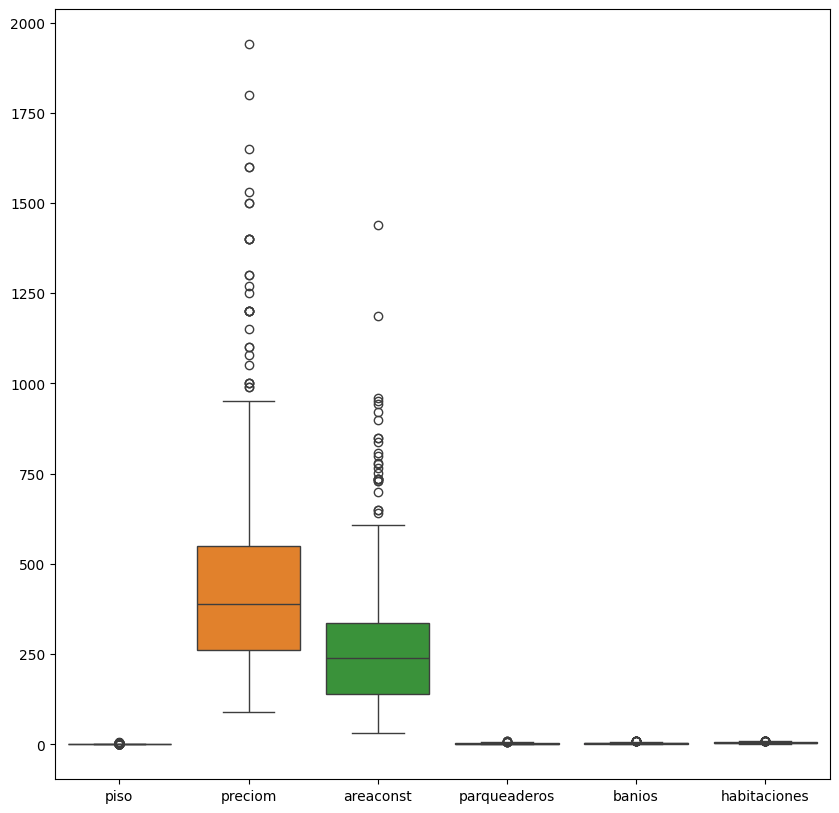

In [13]:
plt.figure(figsize=(10,10))
sns.boxplot(data = df_desc)
plt.show()

Correlaciones

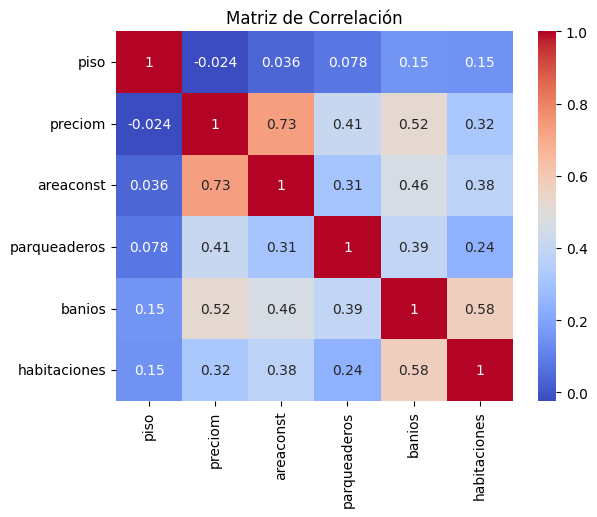

In [14]:
# Graficar
df_corr = df_desc.drop(labels = ["zona","tipo","barrio","estrato"], axis =1)
corr = df_corr.corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Matriz de Correlación")
plt.show()

inicialmente se realiza una correlación incluyendo la variable precio para comprender si se tiene una correlación con alguna de las variables, donde se observa una clara correlación entre el precio y el área construida. por esta razón no se imputan los datos de precio y área construida.
